<a href="https://colab.research.google.com/github/DeepCodeSec/ml1000-p1/blob/working_models/Project1_wine_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working code for wine classification problem.

**Dataset:**
* wine quality data retrieved from https://archive.ics.uci.edu/ml/datasets/Wine+Quality

* using the white wine csv only (had more observations than the red)


**Problem:**
* how do we test if the wine is high quality and should be priced accordingly?

## Install packages and load in dataset

* When using colab, need to install pycaret everytime
* read in the wine quality dataset using the "raw" link from the git repository
  * alternatively can use any other url for the data that ends in .csv
  * trying to avoid linking the colab notebook to git, google drive or local server for reproducibility

In [142]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [143]:
import pandas as pd

df_path = 'https://raw.githubusercontent.com/DeepCodeSec/ml1000-p1/working_models/data/winequality-white.csv'  
dataset = pd.read_csv(df_path, 
                   sep=';') #the separater in the raw data is ;. need to indicate so columns are found
dataset.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [144]:
# What is the distribution of the target variable (quality)
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Recode quality to a binary label
**Original**: quality of wine rated from 0-10 with 10 as the best

Above shows that the minimum rating was a 3 and max is 9. The mean and median are both ~6.

According to this website, a rating of 7+ is good wine. It isn't a big deal if the classes are imbalanced, that just dictates which performance metric we use. It is more important to create our classes based on real-world knowledge.  https://vineroutes.com/wine-rating-system/#:~:text=Wines%20rated%2089%20and%20above,outstanding%20for%20its%20particular%20type.

**New**: binary label (target variable) of 'standard' or 'high quality' where a rating of 7 or above  is high quality and 6 or below is standard

In [145]:
import numpy as np

#add binary classification label
dataset['new_quality'] = np.where(dataset['quality'] > 6, 
                               'high_quality',
                               'standard')
dataset.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,standard
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,standard
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,standard
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,standard
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.1,0.260,0.29,12.4,0.044,62.0,240.0,0.9969,3.04,0.42,9.2,6,standard
96,6.0,0.340,0.66,15.9,0.046,26.0,164.0,0.9979,3.14,0.50,8.8,6,standard
97,8.6,0.265,0.36,1.2,0.034,15.0,80.0,0.9913,2.95,0.36,11.4,7,high_quality
98,9.8,0.360,0.46,10.5,0.038,4.0,83.0,0.9956,2.89,0.30,10.1,4,standard


In [146]:
#drop old quality column and rename new
dataset = dataset.drop(columns=['quality']) #drops old column
dataset = dataset.rename(columns={'new_quality':'quality'}) #renames back to quality

dataset.head() #double check it did what we asked

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,standard
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,standard
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,standard
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,standard
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,standard


## Exploratory analysis report

The code below automatically creates an exploratory data analysis report. The report is output as an html file in the local files (see the files pane on the left.

For the final report/project we will want to highlight specific aspects from the EDA document that justify our decisions below and code these explicitly. For example if we use a parametric classifier that needs independent (non-correlated) predictors, we would want to show the correlation matrix in the notebook that gets published and comment on how much/little the predictors are correlated and how we are dealing with them.

In [147]:
#Load libraries for exploratory analysis
!pip3 install pandas_profiling --upgrade
import pandas_profiling
from pandas_profiling import ProfileReport
import pandas as pd

pr = ProfileReport(dataset)

pr.to_file(output_file="EDA.html")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset has:
* 12 variables (11 numeric predictors and 1 categorical target/label)
* 4898 observations
* no missing values

Distributions:
* imbalanced label classes (~20% high quality and 80% standard)
  * again, this is not an issue, it just tells us that we need to think about undersampling and choose the appropriate performance metric
* most of the predictor variables are fairly normally distributed
* alcohol, volatile acidity, and residual sugar are not normally distributed, so we can consider transforming these columns (eg log transformation) if needed


Interactions:
* skipping, not super interesting for classification because pycaret is just going to run a dozen models anyway. We are more interested in the interactions for a regression type problem where, for example, the revenue from tv x radio adcertisements is predicted better than from tv ads or radio adds alone

Correlations:
* moderate correlation between density + residual sugar, density + alcohol, alcohol + chlorides
* for now leaving, but revisit for fine tuning if we are getting poor performance

Duplicate rows:
* therer are a number of duplicate rows. It is hard to say if these are genuinely duplicates and should be removed, or if they are coincidental duplicates (ie 2 wine samples happen to have the same measurements)


## Split dataset

* 5% test set (unseen until after model is finalized) 
* The remaining 95% will be split in the pycaret setup function

First we remove the 5% test set before any feature engineering to avoid data leakage. Test set is randomly shuffled.

After feature engineering, the remaining data will be split into training and validation sets that follow the same distribution of target labels (ie using stratified sampling).

We also need to take into consideration the sampling method because we have imbalanced classes
* under/over sample
* stratified sampling 
* etc

In [148]:
# split data into 95% and 5%
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (4653, 12)
Unseen Data For Predictions: (245, 12)


In [149]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.9,0.28,0.49,7.7,0.045,48.0,195.0,0.99540,3.04,0.55,11.0,standard
1,5.0,0.24,0.19,5.0,0.043,17.0,101.0,0.99438,3.67,0.57,10.0,standard
2,8.3,0.26,0.31,2.0,0.029,14.0,141.0,0.99077,2.95,0.77,12.2,standard
3,7.7,0.25,0.30,7.8,0.038,67.0,196.0,0.99555,3.10,0.50,10.1,standard
4,4.4,0.32,0.39,4.3,0.030,31.0,127.0,0.98904,3.46,0.36,12.8,high_quality


In [150]:
data_unseen.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,standard
1,8.6,0.23,0.40,4.2,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,standard
2,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,high_quality
3,7.4,0.34,0.42,1.1,0.033,17.0,171.0,0.9917,3.12,0.53,11.3,standard
4,6.0,0.19,0.26,12.4,0.048,50.0,147.0,0.9972,3.30,0.36,8.9,standard


## Data cleaning decisions

* Do outlier/anomaly analysis here. Since the dataset has lower number of observations, opt for solutions that retain as much data as possible (eg capping the data as opposed to removing rows)
* make decisions about transformations etc here

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4653 non-null   float64
 1   volatile acidity      4653 non-null   float64
 2   citric acid           4653 non-null   float64
 3   residual sugar        4653 non-null   float64
 4   chlorides             4653 non-null   float64
 5   free sulfur dioxide   4653 non-null   float64
 6   total sulfur dioxide  4653 non-null   float64
 7   density               4653 non-null   float64
 8   pH                    4653 non-null   float64
 9   sulphates             4653 non-null   float64
 10  alcohol               4653 non-null   float64
 11  quality               4653 non-null   object 
dtypes: float64(11), object(1)
memory usage: 436.3+ KB


* No categorical variables other than the target (class) variable, so no categorical encoding necessary
* Recall from EDA that alcohol, volatile acidity, and residual sugar were not normally distributed, so we can consider transforming these columns (eg log transformation) if needed. For now I will leave and see how the modle does.
* We already know that the data does not contain missing values (from the source and from EDA), so no imutation or row removal necessary.
* We could do feature selection, but since we only have 11 predictors, it is safe to start with a brute force model (ie we just use everything and see what happens)
* Should check for outliers and decide what to do with them. See below:

### Outlier analysis

Two options: 
* 1) When lots of observations in dataset and only a few rows with outlier values (for any column), just remove rows containing outliers.
* 2) When fewer observations and more rows containing outlier values, cap the values at the IQR (interquartile range)

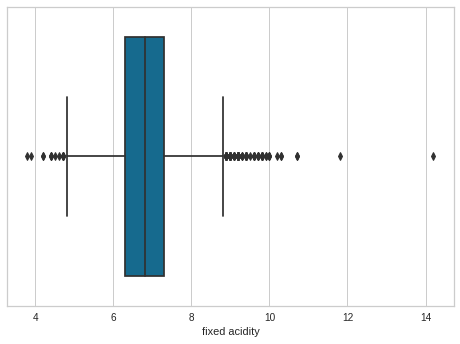

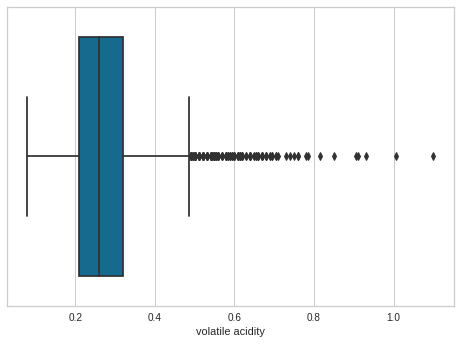

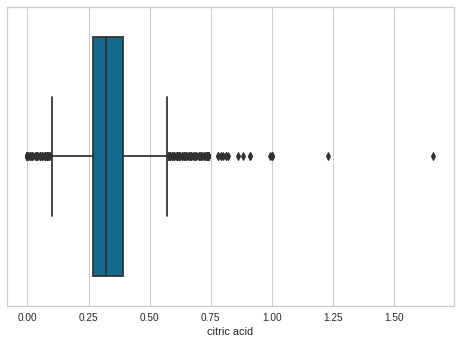

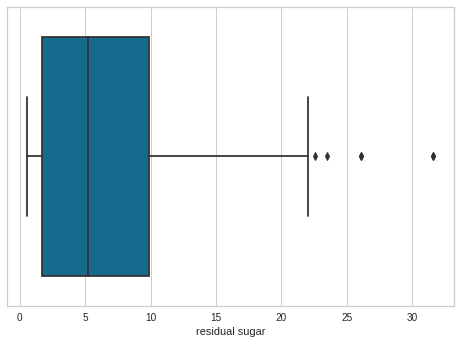

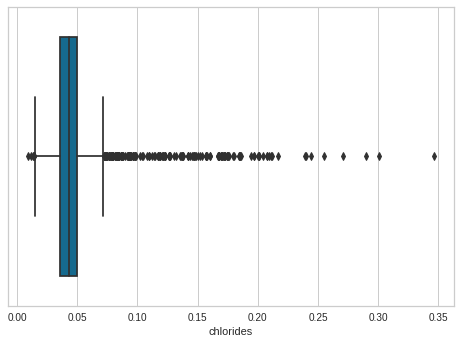

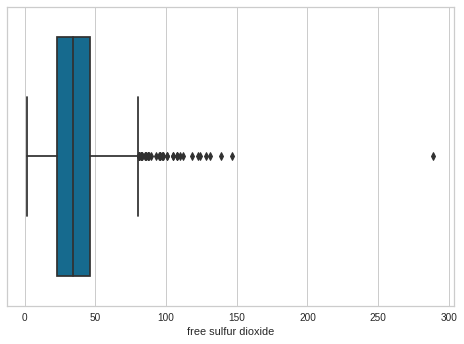

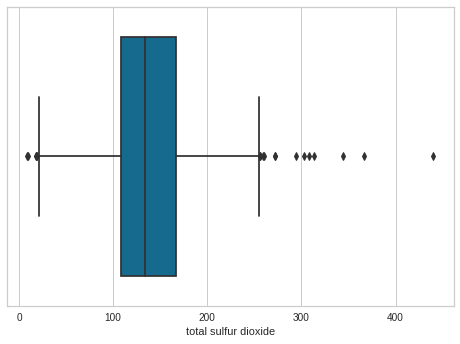

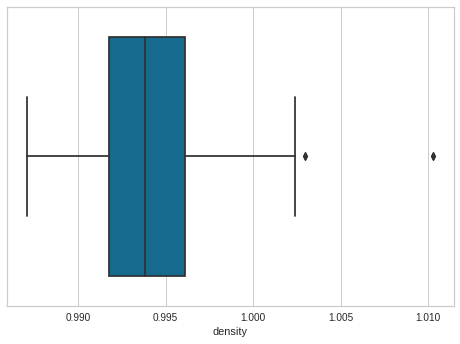

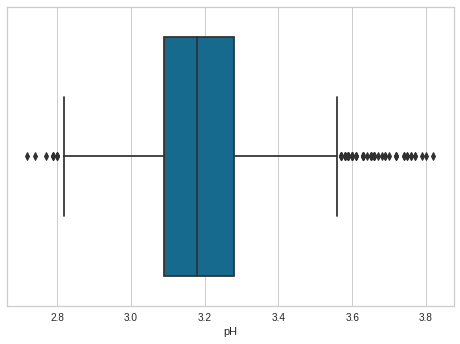

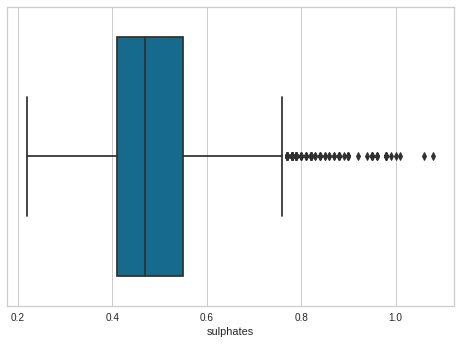

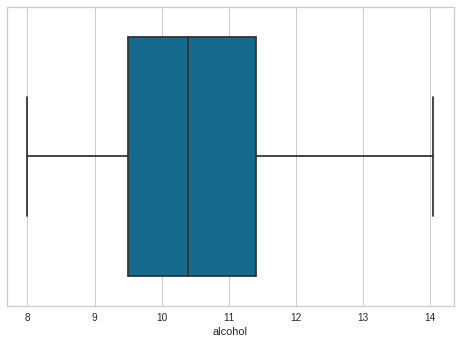

In [152]:
# Outlier analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cols = list(data.columns)

#Create boxplot for every numeric feature (cols 0-11) to show outliers
for col in cols[0:-1]:
  plt.figure()
  sns.boxplot(data[col])
  plt.show()


The boxplots indicate that most of the predictors contain outlier values. Some of these predictors, like chlorides, contain a lot of outliers. Therefore, if we manipulate these values, we'll want to cap them. Sometimes outliers are meaningful to our investigation, so it doesn't make sense to remove or cap. https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/

For now, I'm doing nothing. We can discuss as a group.

## Training classifier models

Now the main event, training classifiers.

In [153]:
from pycaret.classification import *

In [154]:
#setup experiment
exp_P1clf = setup(data = data, target = 'quality', data_split_stratify = True, 
                  session_id = 123)


,Description,Value
0,session_id,123
1,Target,quality
2,Target Type,Binary
3,Label Encoded,"high_quality: 0, standard: 1"
4,Original Data,"(4653, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='quality',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

https://pycaret.readthedocs.io/en/stable/api/classification.html

* default train split is 0.7 training 0.3 validation
* data_split_stratify = True means that the training and validation sets have the same proportion of each class (ie high_quality vs standard wines) 

Options:

* could set transformation to true to make data more gaussian (normal distribution)
* can remove multicolinarity (deals with correlated predictors)
* can also set to do automatic feature selection


In [155]:
#Find best model
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8747,0.9111,0.9609,0.8889,0.9234,0.5829,0.5977,0.346
rf,Random Forest Classifier,0.8677,0.9001,0.9554,0.8856,0.9190,0.5598,0.5733,0.855
lightgbm,Light Gradient Boosting Machine,0.8557,0.8818,0.9370,0.8862,0.9108,0.5345,0.5413,0.103
gbc,Gradient Boosting Classifier,0.8222,0.8518,0.9370,0.8516,0.8922,0.3914,0.4071,0.771
lr,Logistic Regression,0.8017,0.7736,0.9570,0.8203,0.8833,0.2472,0.2889,0.649
dt,Decision Tree Classifier,0.8017,0.7143,0.8678,0.8783,0.8729,0.4212,0.4220,0.080
ridge,Ridge Classifier,0.7995,0.0000,0.9738,0.8095,0.8840,0.1880,0.2505,0.041
ada,Ada Boost Classifier,0.7980,0.8264,0.9112,0.8439,0.8762,0.3313,0.3391,0.556
lda,Linear Discriminant Analysis,0.7952,0.7786,0.9354,0.8265,0.8775,0.2663,0.2892,0.020
dummy,Dummy Classifier,0.7848,0.5000,1.0000,0.7848,0.8794,0.0000,0.0000,0.011


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


The top 3 classifiers, extra trees, random forest, and light gradient boosting all have similar accuracy, auc and F1 scores. Let's tune all three and see which of the tuned models performs best.

**Note:**
Since we have imbalanced classes, accuracy is not our most important performance metric. Let's talk about it as a group, but for now I'll tune for F1

In [156]:
# train a extra tree model
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8405,0.8877,0.9451,0.8638,0.9026,0.4668,0.4816
1,0.8650,0.9142,0.9648,0.8759,0.9182,0.5374,0.5586
2,0.9049,0.9479,0.9727,0.9121,0.9414,0.6907,0.7009
3,0.8865,0.9124,0.9648,0.8982,0.9303,0.6266,0.6385
4,0.8804,0.9251,0.9375,0.9125,0.9249,0.6319,0.6333
5,0.8650,0.8920,0.9727,0.8706,0.9188,0.5260,0.5558
6,0.8957,0.9248,0.9727,0.9022,0.9361,0.6549,0.6688
7,0.8923,0.9258,0.9647,0.9044,0.9336,0.6506,0.6602
8,0.8369,0.8682,0.9412,0.8633,0.9006,0.4522,0.4656


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [157]:
# train a random forest model
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8252,0.8681,0.9451,0.8486,0.8942,0.3981,0.4182
1,0.8650,0.9193,0.9648,0.8759,0.9182,0.5374,0.5586
2,0.9080,0.9389,0.9688,0.9185,0.9430,0.7057,0.7125
3,0.8712,0.9134,0.9375,0.9023,0.9195,0.5971,0.5998
4,0.8773,0.9206,0.9414,0.9060,0.9234,0.6162,0.6191
5,0.8558,0.8677,0.9531,0.8746,0.9121,0.5145,0.5297
6,0.8926,0.9124,0.9766,0.8961,0.9346,0.6385,0.6573
7,0.8862,0.9223,0.9569,0.9037,0.9295,0.6348,0.6419
8,0.8215,0.8430,0.9373,0.8505,0.8918,0.3898,0.4052


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [158]:
# train a lgb model
lgb = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8405,0.8430,0.9412,0.8664,0.9023,0.4729,0.4851
1,0.8405,0.9046,0.9297,0.8750,0.9015,0.4842,0.4904
2,0.8804,0.9183,0.9375,0.9125,0.9249,0.6319,0.6333
3,0.8896,0.9015,0.9375,0.9231,0.9302,0.6656,0.6661
4,0.8712,0.9084,0.9336,0.9053,0.9192,0.6014,0.6032
5,0.8282,0.8523,0.9297,0.8623,0.8947,0.4316,0.4408
6,0.8834,0.9125,0.9648,0.8949,0.9286,0.6143,0.6274
7,0.8585,0.8980,0.9255,0.8973,0.9112,0.5631,0.5648
8,0.8123,0.8144,0.9294,0.8464,0.8860,0.3620,0.3751


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


### Tuning the models

Use the tune_model function to find the optimal hyperparameters for the model. Performance metric will be F1 as a stand-in

In [159]:
# tune extra tree model
tuned_et = tune_model(et, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7853,0.7939,0.9529,0.8073,0.8741,0.1775,0.2110
1,0.8037,0.8846,0.9805,0.8097,0.8869,0.1912,0.2616
2,0.8098,0.8380,0.9688,0.8212,0.8889,0.2592,0.3103
3,0.8160,0.8282,0.9570,0.8333,0.8909,0.3202,0.3547
4,0.8006,0.8350,0.9492,0.8237,0.8820,0.2587,0.2889
5,0.7853,0.7898,0.9570,0.8059,0.8750,0.1521,0.1869
6,0.8006,0.8010,0.9531,0.8215,0.8825,0.2490,0.2827
7,0.8246,0.8666,0.9843,0.8257,0.8980,0.3045,0.3799
8,0.7692,0.7299,0.9451,0.7980,0.8654,0.0974,0.1181


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [160]:
evaluate_model(tuned_et)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [161]:
# tune random forest model
tuned_rf = tune_model(rf, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7822,0.5,1.0,0.7822,0.8778,0.0,0.0
1,0.7853,0.5,1.0,0.7853,0.8797,0.0,0.0
2,0.7853,0.5,1.0,0.7853,0.8797,0.0,0.0
3,0.7853,0.5,1.0,0.7853,0.8797,0.0,0.0
4,0.7853,0.5,1.0,0.7853,0.8797,0.0,0.0
5,0.7853,0.5,1.0,0.7853,0.8797,0.0,0.0
6,0.7853,0.5,1.0,0.7853,0.8797,0.0,0.0
7,0.7846,0.5,1.0,0.7846,0.8793,0.0,0.0
8,0.7846,0.5,1.0,0.7846,0.8793,0.0,0.0


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=3, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [162]:
evaluate_model(tuned_rf)
#random forest is actually a poor choice at least when we optimize F1 because it never predicts high quality

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=3, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [163]:
# tune lgb model
tuned_lgb = tune_model(lgb, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8221,0.8520,0.9294,0.8556,0.8910,0.4121,0.4227
1,0.8528,0.8912,0.9570,0.8688,0.9108,0.4953,0.5149
2,0.8620,0.9080,0.9297,0.8981,0.9136,0.5706,0.5727
3,0.8589,0.9092,0.9219,0.9008,0.9112,0.5681,0.5690
4,0.8712,0.9071,0.9336,0.9053,0.9192,0.6014,0.6032
5,0.8405,0.8320,0.9336,0.8723,0.9019,0.4783,0.4863
6,0.8834,0.9123,0.9531,0.9037,0.9278,0.6273,0.6333
7,0.8677,0.8900,0.9294,0.9046,0.9168,0.5938,0.5951
8,0.7877,0.8217,0.8863,0.8496,0.8676,0.3339,0.3358


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [164]:
evaluate_model(tuned_lgb)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Discuss and choose

* Was F1 actually a good metric to optimize on? Is there another performance metric that would be better? Revist our business question (and then potentially re-tune the models)
* select best performer
* remember that the data is unbalanced. 80% of observations are standard, so if we predict standard all the time, we will be 80% accurate

In [165]:
#ET performance on the validation set
pred_holdout_et = predict_model(tuned_et)
pred_holdout_et.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8181,0.8358,0.9817,0.8212,0.8943,0.2753,0.3476


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label,Score
0,7.4,0.25,0.36,13.2,0.067,53.0,178.0,0.99760,3.01,0.48,9.0,standard,standard,0.8717
1,6.6,0.12,0.25,1.4,0.039,21.0,131.0,0.99114,3.20,0.45,11.2,high_quality,standard,0.6921
2,5.2,0.21,0.31,1.7,0.048,17.0,61.0,0.98953,3.24,0.37,12.0,high_quality,standard,0.6123
3,7.6,0.21,0.35,1.2,0.041,7.0,106.0,0.99140,3.06,0.45,11.3,standard,standard,0.7408
4,6.9,0.24,0.37,6.1,0.027,38.0,112.0,0.99086,3.19,0.34,12.4,standard,standard,0.5001


In [166]:
#RF performance on the validation set
pred_holdout_rf = predict_model(tuned_rf)
pred_holdout_rf.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=3, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7844,0.5,1.0,0.7844,0.8792,0.0,0.0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label,Score
0,7.4,0.25,0.36,13.2,0.067,53.0,178.0,0.99760,3.01,0.48,9.0,standard,standard,0.7848
1,6.6,0.12,0.25,1.4,0.039,21.0,131.0,0.99114,3.20,0.45,11.2,high_quality,standard,0.7848
2,5.2,0.21,0.31,1.7,0.048,17.0,61.0,0.98953,3.24,0.37,12.0,high_quality,standard,0.7848
3,7.6,0.21,0.35,1.2,0.041,7.0,106.0,0.99140,3.06,0.45,11.3,standard,standard,0.7848
4,6.9,0.24,0.37,6.1,0.027,38.0,112.0,0.99086,3.19,0.34,12.4,standard,standard,0.7848


Remember that rf was predicting everything as standard (and we see this in the confidence score. All decisions are 0.7848 confidence

In [167]:
#LGB performance on the validation set
pred_holdout_lgb = predict_model(tuned_lgb)
pred_holdout_lgb.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8574,0.897,0.9324,0.8909,0.9112,0.551,0.5547


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label,Score
0,7.4,0.25,0.36,13.2,0.067,53.0,178.0,0.99760,3.01,0.48,9.0,standard,standard,0.9925
1,6.6,0.12,0.25,1.4,0.039,21.0,131.0,0.99114,3.20,0.45,11.2,high_quality,standard,0.7291
2,5.2,0.21,0.31,1.7,0.048,17.0,61.0,0.98953,3.24,0.37,12.0,high_quality,standard,0.9246
3,7.6,0.21,0.35,1.2,0.041,7.0,106.0,0.99140,3.06,0.45,11.3,standard,standard,0.9955
4,6.9,0.24,0.37,6.1,0.027,38.0,112.0,0.99086,3.19,0.34,12.4,standard,high_quality,0.6936


Better overall accuracy and higher F1 compared to extra tree model. For now let's say we take the LGB model.

In [168]:
#Finalize model and retrain on the combined training and validation sets before testing on the 5% holdout
final_lgb = finalize_model(tuned_lgb)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
       

In [169]:
print(final_lgb)

LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


#### Predict on unseen data (5% holdout)

In [170]:
# 5% sample witheld in the beginning
data_unseen.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,standard
1,8.6,0.23,0.40,4.2,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,standard
2,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,high_quality
3,7.4,0.34,0.42,1.1,0.033,17.0,171.0,0.9917,3.12,0.53,11.3,standard
4,6.0,0.19,0.26,12.4,0.048,50.0,147.0,0.9972,3.30,0.36,8.9,standard


In [171]:
# drop the quality column (classification label) from data_unseen
data_unseen.drop('quality', axis = 1, inplace = True)
data_unseen.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
1,8.6,0.23,0.40,4.2,0.035,17.0,109.0,0.9947,3.14,0.53,9.7
2,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.9912,3.54,0.52,12.4
3,7.4,0.34,0.42,1.1,0.033,17.0,171.0,0.9917,3.12,0.53,11.3
4,6.0,0.19,0.26,12.4,0.048,50.0,147.0,0.9972,3.30,0.36,8.9


In [172]:
#predict class using the finalized model
pred_unseen = predict_model(final_lgb, data=data_unseen)
pred_unseen.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Label,Score
0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,standard,0.9891
1,8.6,0.23,0.40,4.2,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,standard,0.9925
2,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,high_quality,0.7037
3,7.4,0.34,0.42,1.1,0.033,17.0,171.0,0.9917,3.12,0.53,11.3,standard,0.9644
4,6.0,0.19,0.26,12.4,0.048,50.0,147.0,0.9972,3.30,0.36,8.9,standard,0.9979


In [173]:
#save model
save_model(final_lgb,'lgb_final_pipeline')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), model_name=lgb_final_pipeline, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                              

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='quality',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                 colsample_bytree=1.0, feature_fraction=0.5,
                                 importance_type='split', learning_rate=0.4,
                                 max_depth=-1, min_child_samples=6,
                                 min_child_weight=0.

# Alternative Models

## Part 1: more cleaning
* first, outliers will be capped at the 5th and 95th percentiles (capping instead of removing because < 10k observations
* second, we'll log transform the non-normally distributed predictors. There is a transfortamtion argument in the setup function.
* third, the numeric variables are on quite different scales. For example, chlorides ranges from 0.009 - 0.346 while residual sugar ranges from 0.6 - 65.8. This impacts performance on certain classifier algorithms, so we will z-score normalize the features to put them all on the same scale (-3 to +3). There is a normalize argument in the setup function that we can use.
* fourth, we 'll use the remove_multicollinearity argument when we set up the pycaret experiment to deal with the correlated variables

In [174]:
data_clean = data #assign the original data to data_clean for processing
data_clean #double check it did what we asked

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.9,0.28,0.49,7.7,0.045,48.0,195.0,0.99540,3.04,0.55,11.0,standard
1,5.0,0.24,0.19,5.0,0.043,17.0,101.0,0.99438,3.67,0.57,10.0,standard
2,8.3,0.26,0.31,2.0,0.029,14.0,141.0,0.99077,2.95,0.77,12.2,standard
3,7.7,0.25,0.30,7.8,0.038,67.0,196.0,0.99555,3.10,0.50,10.1,standard
4,4.4,0.32,0.39,4.3,0.030,31.0,127.0,0.98904,3.46,0.36,12.8,high_quality
...,...,...,...,...,...,...,...,...,...,...,...,...
4648,7.2,0.08,0.49,1.3,0.050,18.0,148.0,0.99450,3.46,0.44,10.2,standard
4649,7.6,0.10,0.33,1.0,0.031,33.0,93.0,0.99094,3.06,0.68,11.2,standard
4650,6.6,0.24,0.29,2.0,0.023,19.0,86.0,0.99000,3.25,0.45,12.5,standard
4651,7.3,0.24,0.39,3.6,0.024,35.0,116.0,0.99280,3.17,0.51,10.9,standard


In [175]:
data_clean.describe() #remind ourselves of the structre and what needs to be cleaned

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,6.854406,0.277909,0.334030,6.405029,0.045796,35.343327,138.489792,0.994038,3.187746,0.489695,10.504821
std,0.844952,0.100298,0.121024,5.008390,0.021997,17.025677,42.445410,0.002917,0.149787,0.113718,1.227265
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991750,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993800,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996120,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,31.600000,0.346000,289.000000,440.000000,1.010300,3.820000,1.080000,14.050000


In [176]:
data_clean.info() # check that now columns or observations were dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4653 non-null   float64
 1   volatile acidity      4653 non-null   float64
 2   citric acid           4653 non-null   float64
 3   residual sugar        4653 non-null   float64
 4   chlorides             4653 non-null   float64
 5   free sulfur dioxide   4653 non-null   float64
 6   total sulfur dioxide  4653 non-null   float64
 7   density               4653 non-null   float64
 8   pH                    4653 non-null   float64
 9   sulphates             4653 non-null   float64
 10  alcohol               4653 non-null   float64
 11  quality               4653 non-null   object 
dtypes: float64(11), object(1)
memory usage: 436.3+ KB


#### Capping outliers

Opting to cap outliers at the 5th (lower boundary) and 95th (upper boundary) percentiles. Each column is treated separately, so it doesn't matter that the features are on different scales at this point.

In [177]:
tmp = data #creating a temporary to avoid accidentally overwriting the original (let's us compare and verify capping)

In [178]:
cols = list(data.columns)

#Create boxplot for every numeric feature (cols 0-11) to show outliers
for col in cols[0:-1]:
  upper_limit = tmp[col].mean() + 3*tmp[col].std() #~95th percentile
  lower_limit = tmp[col].mean() - 3*tmp[col].std() #~5th percentile
  
  data_clean[col] = np.where(tmp[col]> upper_limit, upper_limit, #if above 95th, set to upper
                        np.where(tmp[col]< lower_limit, lower_limit, #if below 5th, set to lower
                        tmp[col]))


In [179]:
data.describe() #original

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,6.850118,0.276365,0.332596,6.397731,0.044657,35.177759,138.378840,0.994035,3.187297,0.488841,10.504821
std,0.825395,0.093928,0.114794,4.980920,0.015199,16.129989,41.971721,0.002903,0.148243,0.110615,1.227265
min,4.319549,0.080000,0.000000,0.600000,0.009000,2.000000,11.153562,0.987110,2.738384,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991750,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993800,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996120,3.280000,0.550000,11.400000
max,9.389263,0.578803,0.697101,21.430199,0.111788,86.420357,265.826021,1.002789,3.637107,0.830847,14.050000


In [180]:
data_clean.describe() #clean. Verify by checking max and min

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,6.850118,0.276365,0.332596,6.397731,0.044657,35.177759,138.378840,0.994035,3.187297,0.488841,10.504821
std,0.825395,0.093928,0.114794,4.980920,0.015199,16.129989,41.971721,0.002903,0.148243,0.110615,1.227265
min,4.319549,0.080000,0.000000,0.600000,0.009000,2.000000,11.153562,0.987110,2.738384,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991750,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993800,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996120,3.280000,0.550000,11.400000
max,9.389263,0.578803,0.697101,21.430199,0.111788,86.420357,265.826021,1.002789,3.637107,0.830847,14.050000


### Setup new expperiment
Now that the outliers are capped, we can address the other three steps mentioned above in our setup function. We'll give this experiment a new name.

In [181]:
#setup experiment
exp2_P1clf = setup(data = data_clean, #make sure to use cleaned data (outliers capped)
                   target = 'quality', data_split_stratify = True, session_id = 123,
                   transformation=True, #applies the power transform to make data more Gaussian-like
                   normalize=True, #transforms the numeric features by scaling them to a given range (default is z-score)
                   remove_multicollinearity=True, #features with the inter-correlations higher than the defined threshold are removed. When two features are highly correlated with each other, the feature that is less correlated with the target variable is removed
                   multicollinearity_threshold = 0.7 #by default was 0.9
                )

,Description,Value
0,session_id,123
1,Target,quality
2,Target Type,Binary
3,Label Encoded,"high_quality: 0, standard: 1"
4,Original Data,"(4653, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='quality',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('dummy', Dummify(target='quality')),
                ('fix_perfect', Remove_100(target='quality')),
                ('clean_names', Clean_Colum_Names()),
   

In [182]:
#Find best model on cleaned data
best_clean_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8723,0.9134,0.9609,0.8864,0.9220,0.5720,0.5872,0.464
rf,Random Forest Classifier,0.8658,0.8982,0.9527,0.8855,0.9177,0.5561,0.5680,0.837
lightgbm,Light Gradient Boosting Machine,0.8538,0.8780,0.9382,0.8833,0.9098,0.5262,0.5337,0.170
gbc,Gradient Boosting Classifier,0.8213,0.8479,0.9417,0.8476,0.8921,0.3794,0.3988,0.373
knn,K Neighbors Classifier,0.8210,0.8171,0.9100,0.8684,0.8887,0.4334,0.4369,0.053
dt,Decision Tree Classifier,0.8035,0.7237,0.8639,0.8834,0.8734,0.4341,0.4352,0.043
lda,Linear Discriminant Analysis,0.8001,0.7694,0.9601,0.8172,0.8829,0.2301,0.2733,0.017
qda,Quadratic Discriminant Analysis,0.7977,0.8083,0.8897,0.8581,0.8735,0.3684,0.3706,0.015
ada,Ada Boost Classifier,0.7971,0.8165,0.9167,0.8396,0.8764,0.3152,0.3252,0.158
lr,Logistic Regression,0.7964,0.7712,0.9617,0.8131,0.8811,0.2051,0.2501,0.020


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


Notice that the top 3 models are the same as with the uncleaned data, but they occur in a different order.

### Tuning top 3

Now we'll tune the top 3 on the cleaned data. Here we will also make decisions about the best performance metric.

In [133]:
# tune rf model
tuned_clean_rf = tune_model(rf, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7945,0.8278,0.5143,0.5217,0.5180,0.3874,0.3874
1,0.8221,0.8199,0.5714,0.5882,0.5797,0.4669,0.4670
2,0.8067,0.7957,0.2429,0.6296,0.3505,0.2623,0.3036
3,0.8098,0.8163,0.3000,0.6176,0.4038,0.3065,0.3348
4,0.7853,0.8144,0.4857,0.5000,0.4928,0.3566,0.3567
5,0.7853,0.7693,0.2714,0.5000,0.3519,0.2365,0.2524
6,0.7883,0.7820,0.3380,0.5217,0.4103,0.2884,0.2985
7,0.8031,0.8395,0.3000,0.5833,0.3962,0.2928,0.3159
8,0.8092,0.7960,0.3571,0.5952,0.4464,0.3398,0.3560


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [134]:
# tune extra tree model
tuned_clean_et = tune_model(et, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8129,0.8387,0.1714,0.8000,0.2824,0.2235,0.3130
1,0.8252,0.8590,0.2000,0.9333,0.3294,0.2744,0.3843
2,0.8405,0.8406,0.2714,0.9500,0.4222,0.3613,0.4578
3,0.8098,0.8330,0.1857,0.7222,0.2955,0.2276,0.2988
4,0.8067,0.8198,0.2000,0.6667,0.3077,0.2315,0.2888
5,0.8252,0.8087,0.2714,0.7600,0.4000,0.3236,0.3827
6,0.7975,0.7618,0.2254,0.5926,0.3265,0.2347,0.2729
7,0.8000,0.8672,0.1857,0.6190,0.2857,0.2069,0.2581
8,0.8154,0.8266,0.2143,0.7500,0.3333,0.2628,0.3330


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [135]:
# tune lgb model
tuned_clean_lgb = tune_model(lgb, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8313,0.8569,0.4143,0.6744,0.5133,0.4182,0.4364
1,0.8497,0.8549,0.5571,0.6842,0.6142,0.5221,0.5263
2,0.8558,0.8670,0.5429,0.7170,0.6179,0.5311,0.5389
3,0.8620,0.8579,0.4857,0.7907,0.6018,0.5240,0.5468
4,0.8650,0.8781,0.5857,0.7321,0.6508,0.5684,0.5739
5,0.8221,0.8188,0.3714,0.6500,0.4727,0.3751,0.3964
6,0.8528,0.8595,0.5915,0.6885,0.6364,0.5447,0.5472
7,0.8923,0.9175,0.6571,0.8070,0.7244,0.6584,0.6637
8,0.8708,0.8964,0.5571,0.7800,0.6500,0.5734,0.5856


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


#### Evaluate the tuned models
First we'll compare to each other, then we will compare to the uncleaned data

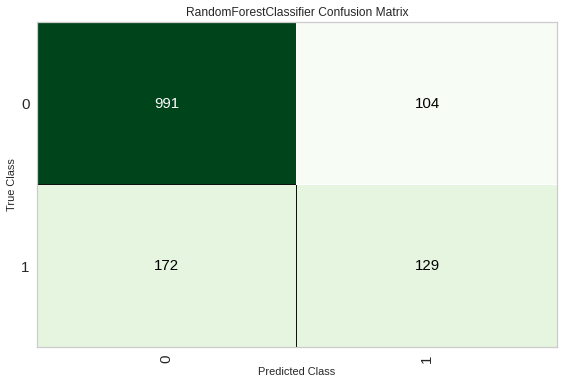

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [136]:
plot_model(tuned_clean_rf, plot = 'confusion_matrix')
#evaluate_model(tuned_clean_rf)

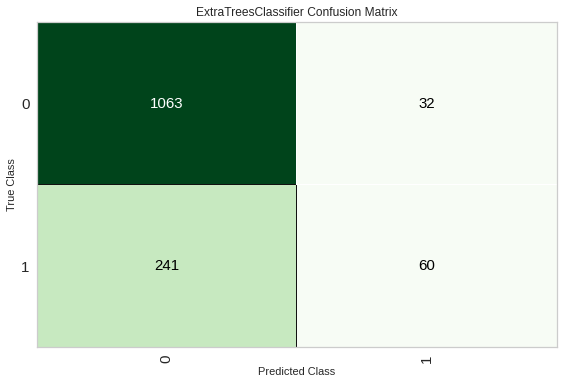

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [137]:
plot_model(tuned_clean_et, plot = 'confusion_matrix')


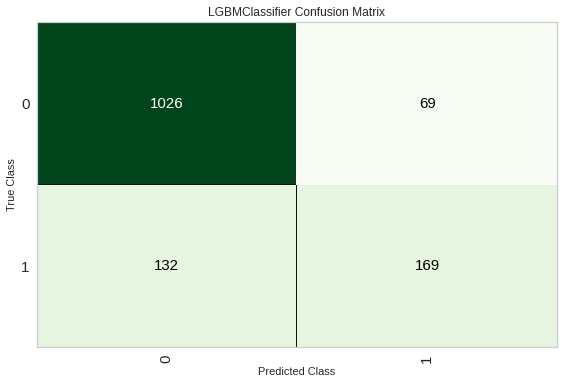

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [138]:
plot_model(tuned_clean_lgb, plot = 'confusion_matrix')

#### Performance on validation set (predict the holdout)

In [139]:
#ET performance on the validation set
pred_clean_holdout_et = predict_model(tuned_clean_et)
pred_clean_holdout_et.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8044,0.8221,0.1993,0.6522,0.3053,0.2273,0.282


,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,Label,Score
0,-0.236945,-0.148537,0.257667,-0.784333,0.283892,-0.370703,0.099835,-0.821698,1.652311,0,1,0.5915
1,-1.328910,-1.023989,-0.695223,0.013572,-0.024714,-0.296549,0.298438,-0.701081,-1.137028,0,0,0.8861
2,-0.632079,-0.419966,1.337734,0.600194,1.743240,1.603736,0.363247,-1.599922,-0.803320,0,0,0.9149
3,0.598951,1.135776,-0.905309,0.600194,-1.096339,-0.852266,-0.536955,0.662836,0.691685,0,0,0.7869
4,0.818899,0.215861,0.082074,0.471080,0.513223,0.978935,1.217709,0.957118,-0.194076,0,0,0.8903


In [140]:
#RF performance on the validation set
pred_clean_holdout_rf = predict_model(tuned_clean_rf)
pred_clean_holdout_rf.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8023,0.8126,0.4286,0.5536,0.4831,0.3634,0.3679


,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,Label,Score
0,-0.236945,-0.148537,0.257667,-0.784333,0.283892,-0.370703,0.099835,-0.821698,1.652311,0,1,0.9348
1,-1.328910,-1.023989,-0.695223,0.013572,-0.024714,-0.296549,0.298438,-0.701081,-1.137028,0,0,0.8354
2,-0.632079,-0.419966,1.337734,0.600194,1.743240,1.603736,0.363247,-1.599922,-0.803320,0,0,0.9737
3,0.598951,1.135776,-0.905309,0.600194,-1.096339,-0.852266,-0.536955,0.662836,0.691685,0,0,0.7321
4,0.818899,0.215861,0.082074,0.471080,0.513223,0.978935,1.217709,0.957118,-0.194076,0,0,0.6833


In [141]:
#LGB performance on the validation set
pred_clean_holdout_lgb = predict_model(tuned_clean_lgb)
pred_clean_holdout_lgb.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.856,0.8814,0.5615,0.7101,0.6271,0.5394,0.5451


,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,Label,Score
0,-0.236945,-0.148537,0.257667,-0.784333,0.283892,-0.370703,0.099835,-0.821698,1.652311,0,1,0.9816
1,-1.328910,-1.023989,-0.695223,0.013572,-0.024714,-0.296549,0.298438,-0.701081,-1.137028,0,0,0.9897
2,-0.632079,-0.419966,1.337734,0.600194,1.743240,1.603736,0.363247,-1.599922,-0.803320,0,0,0.9993
3,0.598951,1.135776,-0.905309,0.600194,-1.096339,-0.852266,-0.536955,0.662836,0.691685,0,0,0.9811
4,0.818899,0.215861,0.082074,0.471080,0.513223,0.978935,1.217709,0.957118,-0.194076,0,0,0.9793


## One more time, recoding the target label so 0 = standard, high quality = 1 and SMOTE to balance the training set

In [183]:
df_path = 'https://raw.githubusercontent.com/DeepCodeSec/ml1000-p1/working_models/data/winequality-white.csv'  
dataset = pd.read_csv(df_path, 
                   sep=';') #the separater in the raw data is ;. need to indicate so columns are found
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [184]:
import numpy as np

#add binary classification label
dataset['new_quality'] = np.where(dataset['quality'] > 6, 
                               1,
                               0)
dataset.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.1,0.260,0.29,12.4,0.044,62.0,240.0,0.9969,3.04,0.42,9.2,6,0
96,6.0,0.340,0.66,15.9,0.046,26.0,164.0,0.9979,3.14,0.50,8.8,6,0
97,8.6,0.265,0.36,1.2,0.034,15.0,80.0,0.9913,2.95,0.36,11.4,7,1
98,9.8,0.360,0.46,10.5,0.038,4.0,83.0,0.9956,2.89,0.30,10.1,4,0


In [185]:
#drop old quality column and rename new
dataset = dataset.drop(columns=['quality']) #drops old column
dataset = dataset.rename(columns={'new_quality':'quality'}) #renames back to quality

dataset.head() #double check it did what we asked

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [186]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (4653, 12)
Unseen Data For Predictions: (245, 12)


In [187]:
data_clean = data
tmp = data 
tmp.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.9,0.28,0.49,7.7,0.045,48.0,195.0,0.99540,3.04,0.55,11.0,0
1,5.0,0.24,0.19,5.0,0.043,17.0,101.0,0.99438,3.67,0.57,10.0,0
2,8.3,0.26,0.31,2.0,0.029,14.0,141.0,0.99077,2.95,0.77,12.2,0
3,7.7,0.25,0.30,7.8,0.038,67.0,196.0,0.99555,3.10,0.50,10.1,0
4,4.4,0.32,0.39,4.3,0.030,31.0,127.0,0.98904,3.46,0.36,12.8,1


In [188]:
cols = list(tmp.columns)

#Create boxplot for every numeric feature (cols 0-11) to show outliers
for col in cols[0:-1]:
  upper_limit = tmp[col].mean() + 3*tmp[col].std() #~95th percentile
  lower_limit = tmp[col].mean() - 3*tmp[col].std() #~5th percentile
  
  data_clean[col] = np.where(tmp[col]> upper_limit, upper_limit, #if above 95th, set to upper
                        np.where(tmp[col]< lower_limit, lower_limit, #if below 5th, set to lower
                        tmp[col]))

In [189]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,6.850118,0.276365,0.332596,6.397731,0.044657,35.177759,138.378840,0.994035,3.187297,0.488841,10.504821,0.215345
std,0.825395,0.093928,0.114794,4.980920,0.015199,16.129989,41.971721,0.002903,0.148243,0.110615,1.227265,0.411106
min,4.319549,0.080000,0.000000,0.600000,0.009000,2.000000,11.153562,0.987110,2.738384,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991750,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993800,3.180000,0.470000,10.400000,0.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996120,3.280000,0.550000,11.400000,0.000000
max,9.389263,0.578803,0.697101,21.430199,0.111788,86.420357,265.826021,1.002789,3.637107,0.830847,14.050000,1.000000


In [190]:
data_clean.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,6.850118,0.276365,0.332596,6.397731,0.044657,35.177759,138.378840,0.994035,3.187297,0.488841,10.504821,0.215345
std,0.825395,0.093928,0.114794,4.980920,0.015199,16.129989,41.971721,0.002903,0.148243,0.110615,1.227265,0.411106
min,4.319549,0.080000,0.000000,0.600000,0.009000,2.000000,11.153562,0.987110,2.738384,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991750,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993800,3.180000,0.470000,10.400000,0.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996120,3.280000,0.550000,11.400000,0.000000
max,9.389263,0.578803,0.697101,21.430199,0.111788,86.420357,265.826021,1.002789,3.637107,0.830847,14.050000,1.000000


In [191]:
exp3_P1clf = setup(data = data_clean, #make sure to use cleaned data (outliers capped)
                   target = 'quality', data_split_stratify = True, session_id = 123,
                   transformation=True, #applies the power transform to make data more Gaussian-like
                   normalize=True, #transforms the numeric features by scaling them to a given range (default is z-score)
                   remove_multicollinearity=True, #features with the inter-correlations higher than the defined threshold are removed. When two features are highly correlated with each other, the feature that is less correlated with the target variable is removed
                   multicollinearity_threshold = 0.7, #by default was 0.9
                   fix_imbalance=True #default method is SMOTE
                )

,Description,Value
0,session_id,123
1,Target,quality
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(4653, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='quality',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('dummy', Dummify(target='quality')),
                ('fix_perfect', Remove_100(target='quality')),
                ('clean_names', Clean_Colum_Names()),
   

In [192]:
#Find best model on cleaned data with target properly coded
best_recoded_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8618,0.9110,0.6990,0.6731,0.6829,0.5949,0.5972,0.790
rf,Random Forest Classifier,0.8493,0.8993,0.6975,0.6375,0.6642,0.5675,0.5699,1.149
lightgbm,Light Gradient Boosting Machine,0.8394,0.8786,0.6177,0.6314,0.6226,0.5209,0.5222,0.320
dt,Decision Tree Classifier,0.8004,0.7466,0.6520,0.5297,0.5836,0.4544,0.4593,0.055
dummy,Dummy Classifier,0.7848,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.024
gbc,Gradient Boosting Classifier,0.7835,0.8475,0.7219,0.4983,0.5890,0.4489,0.4636,0.755
ada,Ada Boost Classifier,0.7562,0.8135,0.7162,0.4589,0.5589,0.4018,0.4210,0.353
knn,K Neighbors Classifier,0.7498,0.8262,0.7561,0.4521,0.5649,0.4048,0.4322,0.068
lr,Logistic Regression,0.7099,0.7818,0.7819,0.4088,0.5368,0.3544,0.3943,0.493
ridge,Ridge Classifier,0.7046,0.0000,0.7947,0.4051,0.5365,0.3517,0.3951,0.024


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


Again, same top 3, but looks like better accuracy

In [193]:
tuned_recoded_rf = tune_model(rf, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7607,0.8488,0.8000,0.4667,0.5895,0.4367,0.4683
1,0.7423,0.8577,0.7714,0.4426,0.5625,0.3983,0.4292
2,0.7883,0.8522,0.7286,0.5050,0.5965,0.4594,0.4735
3,0.8006,0.8294,0.7286,0.5258,0.6108,0.4814,0.4930
4,0.7914,0.8459,0.7571,0.5096,0.6092,0.4742,0.4915
5,0.7270,0.7986,0.6143,0.4095,0.4914,0.3149,0.3270
6,0.7117,0.8130,0.6761,0.4034,0.5053,0.3197,0.3409
7,0.8185,0.8957,0.8857,0.5487,0.6776,0.5608,0.5919
8,0.7692,0.8389,0.6429,0.4737,0.5455,0.3955,0.4038


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


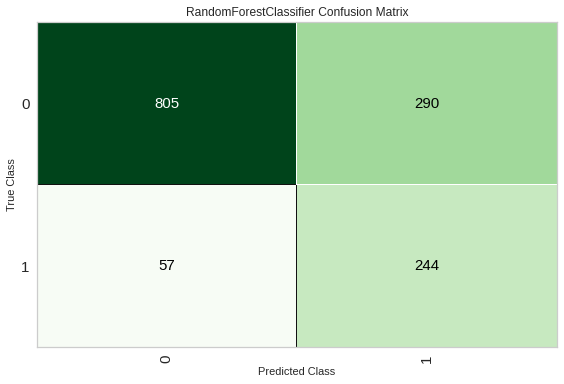

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [194]:
plot_model(tuned_recoded_rf, plot = 'confusion_matrix')

In [195]:
tuned_recoded_et = tune_model(et, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7577,0.8511,0.8143,0.4634,0.5907,0.4364,0.4714
1,0.7546,0.8648,0.8714,0.4621,0.6040,0.4495,0.4970
2,0.7607,0.8509,0.7429,0.4643,0.5714,0.4175,0.4397
3,0.7546,0.8430,0.7857,0.4583,0.5789,0.4222,0.4528
4,0.7699,0.8337,0.7571,0.4775,0.5856,0.4375,0.4598
5,0.7270,0.8137,0.6714,0.4159,0.5137,0.3382,0.3569
6,0.7086,0.7877,0.6901,0.4016,0.5078,0.3207,0.3445
7,0.8092,0.8863,0.9143,0.5333,0.6737,0.5517,0.5917
8,0.7323,0.8411,0.7000,0.4261,0.5297,0.3578,0.3793


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


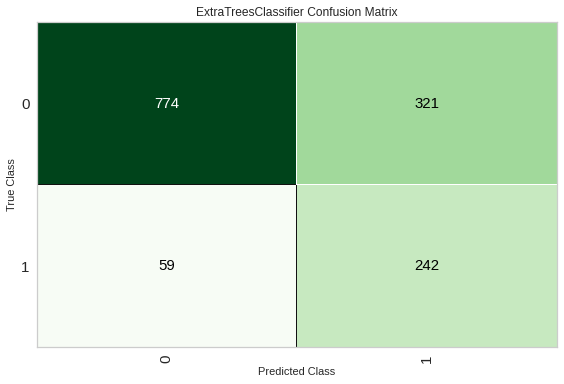

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [196]:
plot_model(tuned_recoded_et, plot = 'confusion_matrix')

In [197]:
tuned_recoded_lgb = tune_model(lgb, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8436,0.8950,0.5857,0.6508,0.6165,0.5186,0.5198
1,0.8497,0.8511,0.6286,0.6567,0.6423,0.5472,0.5475
2,0.8466,0.8560,0.5857,0.6613,0.6212,0.5255,0.5270
3,0.8497,0.8589,0.5857,0.6721,0.6260,0.5325,0.5344
4,0.8650,0.8932,0.7429,0.6667,0.7027,0.6157,0.6172
5,0.8313,0.8319,0.5286,0.6271,0.5736,0.4694,0.4721
6,0.8650,0.8614,0.6620,0.7015,0.6812,0.5956,0.5961
7,0.8615,0.9282,0.8000,0.6437,0.7134,0.6235,0.6299
8,0.8462,0.8969,0.6143,0.6515,0.6324,0.5352,0.5356


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


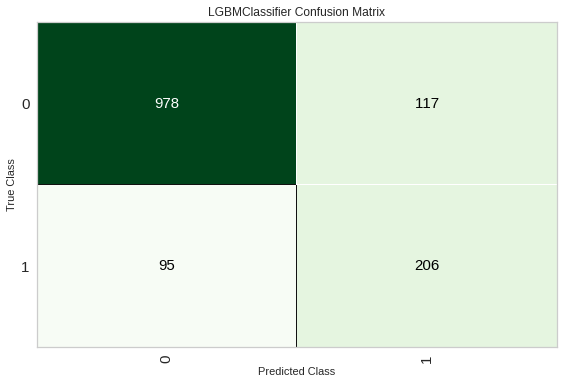

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [198]:
plot_model(tuned_recoded_lgb, plot = 'confusion_matrix')

### Predict holdout

In [199]:
#RF performance on the validation set
pred_recoded_holdout_rf = predict_model(tuned_recoded_rf)
pred_recoded_holdout_rf.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7514,0.8463,0.8106,0.4569,0.5844,0.4262,0.4618


,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,Label,Score
0,-0.236945,-0.148537,0.257667,-0.784333,0.283892,-0.370703,0.099835,-0.821698,1.652311,0,1,0.8370
1,-1.328910,-1.023989,-0.695223,0.013572,-0.024714,-0.296549,0.298438,-0.701081,-1.137028,0,0,0.8497
2,-0.632079,-0.419966,1.337734,0.600194,1.743240,1.603736,0.363247,-1.599922,-0.803320,0,0,0.9001
3,0.598951,1.135776,-0.905309,0.600194,-1.096339,-0.852266,-0.536955,0.662836,0.691685,0,0,0.7342
4,0.818899,0.215861,0.082074,0.471080,0.513223,0.978935,1.217709,0.957118,-0.194076,0,0,0.7873


In [200]:
#ET performance on the validation set
pred_recoded_holdout_et = predict_model(tuned_recoded_et)
pred_recoded_holdout_et.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7278,0.8375,0.804,0.4298,0.5602,0.3883,0.4282


,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,Label,Score
0,-0.236945,-0.148537,0.257667,-0.784333,0.283892,-0.370703,0.099835,-0.821698,1.652311,0,1,0.8592
1,-1.328910,-1.023989,-0.695223,0.013572,-0.024714,-0.296549,0.298438,-0.701081,-1.137028,0,0,0.7546
2,-0.632079,-0.419966,1.337734,0.600194,1.743240,1.603736,0.363247,-1.599922,-0.803320,0,0,0.8483
3,0.598951,1.135776,-0.905309,0.600194,-1.096339,-0.852266,-0.536955,0.662836,0.691685,0,0,0.5832
4,0.818899,0.215861,0.082074,0.471080,0.513223,0.978935,1.217709,0.957118,-0.194076,0,0,0.7107


In [201]:
#LGB performance on the validation set
pred_recoded_holdout_lgb = predict_model(tuned_recoded_lgb)
pred_recoded_holdout_lgb.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8481,0.8873,0.6844,0.6378,0.6603,0.5626,0.5632


,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,Label,Score
0,-0.236945,-0.148537,0.257667,-0.784333,0.283892,-0.370703,0.099835,-0.821698,1.652311,0,1,0.9891
1,-1.328910,-1.023989,-0.695223,0.013572,-0.024714,-0.296549,0.298438,-0.701081,-1.137028,0,0,0.9937
2,-0.632079,-0.419966,1.337734,0.600194,1.743240,1.603736,0.363247,-1.599922,-0.803320,0,0,0.9987
3,0.598951,1.135776,-0.905309,0.600194,-1.096339,-0.852266,-0.536955,0.662836,0.691685,0,0,0.9486
4,0.818899,0.215861,0.082074,0.471080,0.513223,0.978935,1.217709,0.957118,-0.194076,0,0,0.9569


LGB has best test set accuracy (0.85) and lowest FP rate. We can argue for the business purposes that it is harmful to the brand to sell low quality wine as high quality. LGB also shows highest AUC and F1 scores.

## Finalize
If we like this model, finalize, test the unseen and untransformed data, then save pkl for heroku.